In [93]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
# Loading the dataset and getting the information on the columns
df = pd.read_csv('D:/UO/Term-4/IAI-5101/Assignment-2/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [96]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


<AxesSubplot:ylabel='Frequency'>

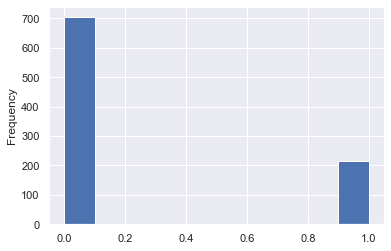

In [97]:
# SECTION - A
# Exploratory Data Analysis (EDA)
# Univariate Analysis 
df['FastingBS'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

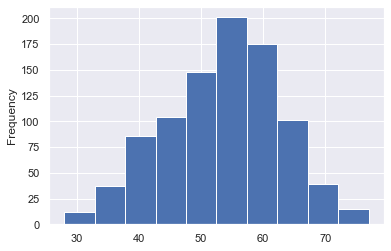

In [98]:
df['Age'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

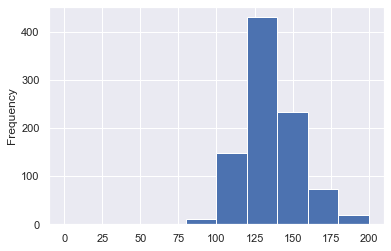

In [99]:
df['RestingBP'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

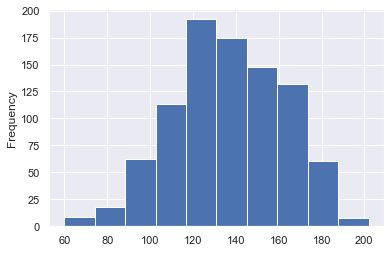

In [100]:
df['MaxHR'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

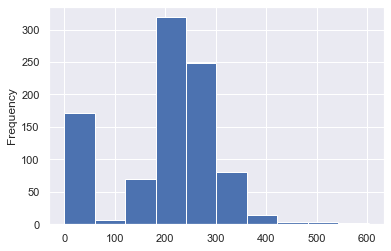

In [101]:
df['Cholesterol'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

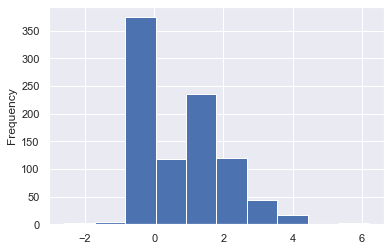

In [102]:
df['Oldpeak'].plot.hist()

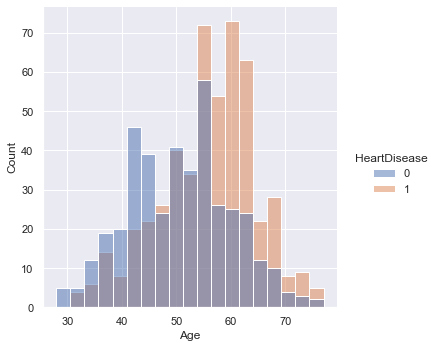

In [103]:
# Bivariate Analysis: 
# Histogram showing age against target variable
sns.set(style="darkgrid")
sns.displot(df, x="Age", hue="HeartDisease")

<AxesSubplot:title={'center':'Age'}, xlabel='Sex'>

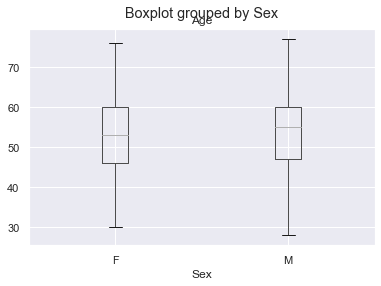

In [104]:
# Comparing the Median Age for Male and Female using pandas
df.boxplot(by='Sex', column=['Age'], grid=True)

<AxesSubplot:xlabel='Age', ylabel='Sex'>

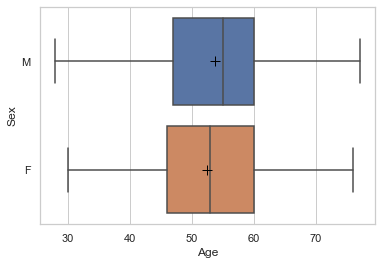

In [105]:
# Comparing the Median Age for Male and Female using Seaborn
sns.set_style("whitegrid")

sns.boxplot(x='Age',
            y='Sex',
            data=df,
            showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"})

<AxesSubplot:>

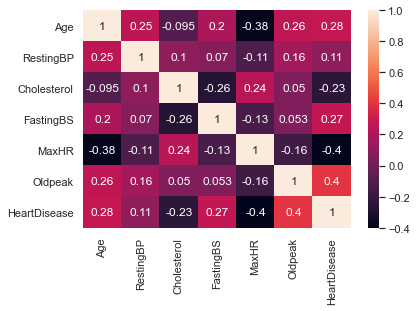

In [106]:
# Multivariate Analysis
# Correlation between predictor variables
cor_mat = df.corr()
sns.heatmap(cor_mat, annot=True)

In [107]:
# Validating the Upper Triangular Matrix in a bid to drop deeply correlated features
upper_tri = cor_mat.where(np.triu(np.ones(cor_mat.shape), k =1).astype(np.bool))
print(upper_tri)

              Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak  \
Age           NaN   0.254399    -0.095282   0.198039 -0.382045  0.258612   
RestingBP     NaN        NaN     0.100893   0.070193 -0.112135  0.164803   
Cholesterol   NaN        NaN          NaN  -0.260974  0.235792  0.050148   
FastingBS     NaN        NaN          NaN        NaN -0.131438  0.052698   
MaxHR         NaN        NaN          NaN        NaN       NaN -0.160691   
Oldpeak       NaN        NaN          NaN        NaN       NaN       NaN   
HeartDisease  NaN        NaN          NaN        NaN       NaN       NaN   

              HeartDisease  
Age               0.282039  
RestingBP         0.107589  
Cholesterol      -0.232741  
FastingBS         0.267291  
MaxHR            -0.400421  
Oldpeak           0.403951  
HeartDisease           NaN  


<ipython-input-107-ee24dff9d01c>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor_mat.where(np.triu(np.ones(cor_mat.shape), k =1).astype(np.bool))


In [108]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(to_drop)

[]


In [109]:
# SECTION - B
# Feature Engineering

# 1. Checking for duplicates and dropping them
df = df.drop_duplicates()

In [110]:
# Checking for null values in each features
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [111]:
#2 Handling the Outliers in the dataset.
# Viewing the outliers count first
print(df[df['Cholesterol']==0].shape[0])
print(df[df['RestingBP']==0].shape[0])
print(df[df['Oldpeak']<0].shape[0])

172
1
13


In [112]:
# Looking at the distribution other than the outliers we can see that
# Cholesterol has normal distribution (excluding outliers), using mean here
# RestingBP -> Left Skewed -> Using Median
# Oldpeak -> Right Skewed -> Using Median

df['Cholesterol']=df['Cholesterol'].replace(0, df['Cholesterol'].mean())
df['RestingBP']=df['RestingBP'].replace(0, df['RestingBP'].median())
df['Oldpeak']=np.where(df.Oldpeak < 0, df['Oldpeak'].median(), df.Oldpeak)

In [113]:
# Verifying the removal of outliers
print(df[df['Cholesterol']==0].shape[0])
print(df[df['RestingBP']==0].shape[0])
print(df[df['Oldpeak']<0].shape[0])

0
0
0


In [114]:
# Class imbalance is checked before splitting the model.
# Next the focus is on encoding the categorical data into numeric data
# The categorical features and their value counts are checked first.
print(df['ChestPainType'].value_counts())
print(df['RestingECG'].value_counts())
print(df['ExerciseAngina'].value_counts())
print(df['ST_Slope'].value_counts())

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64
Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64
N    547
Y    371
Name: ExerciseAngina, dtype: int64
Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64


In [115]:
# 4. Encoding Categorical values to integer codes
# 5 features are non numeric: Sex, ChestPainType, RestingECG, ExerciseAngina and ST_Slope.
# Encoding Sex through mapping as it is a binary feature
df['Sex'] = df['Sex'].map({'M':1, 'F':0})
# Encoding ExerciseAngina through mapping as it is a binary feature
df['ExerciseAngina'] = df['ExerciseAngina'].map({'N':1, 'Y':0})

In [116]:
print(df['ChestPainType'])

0      ATA
1      NAP
2      ATA
3      ASY
4      NAP
      ... 
913     TA
914    ASY
915    ASY
916    ATA
917    NAP
Name: ChestPainType, Length: 918, dtype: object


In [117]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['ChestPainType'] = encoder.fit_transform(df['ChestPainType'])
print(df['ChestPainType'].value_counts())

0    496
2    203
1    173
3     46
Name: ChestPainType, dtype: int64


In [118]:
df['RestingECG'] = encoder.fit_transform(df['RestingECG'])
print(df['RestingECG'].value_counts())

1    552
0    188
2    178
Name: RestingECG, dtype: int64


In [119]:
df['ST_Slope'] = encoder.fit_transform(df['ST_Slope'])
print(df['ST_Slope'].value_counts())

1    460
2    395
0     63
Name: ST_Slope, dtype: int64


In [120]:
# Verifying the Data Types of the features after encoding.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int32  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    float64
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int32  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int32  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(2), int32(3), int64(7)
memory usage: 82.5 KB


In [121]:
df.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,0.781046,132.538126,236.047413,0.233115,0.989107,136.809368,0.595861,0.909804,1.361656,0.553377
std,9.432617,0.407701,0.956519,17.990127,56.240952,0.423046,0.631671,25.460334,0.490992,1.040160,0.607056,0.497414
min,28.000000,0.000000,0.000000,80.000000,85.000000,0.000000,0.000000,60.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,1.000000,0.000000,120.000000,198.799564,0.000000,1.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,0.000000,130.000000,223.000000,0.000000,1.000000,138.000000,1.000000,0.600000,1.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000


In [122]:
# 5. Scaling the data 
from sklearn.preprocessing import MinMaxScaler
# Age, MaxHR, Cholesterol and RestingBP have varying scales per the above description
# Using MinMaxScaler to transform these values between the interval (0,1)
df['Age'] = MinMaxScaler().fit_transform(np.array(df['Age']).reshape(-1,1))
df['MaxHR'] = MinMaxScaler().fit_transform(np.array(df['MaxHR']).reshape(-1,1))
df['Cholesterol'] = MinMaxScaler().fit_transform(np.array(df['Cholesterol']).reshape(-1,1))
df['RestingBP'] = MinMaxScaler().fit_transform(np.array(df['RestingBP']).reshape(-1,1))

In [123]:
# Verifying the output below, we see that all the features are scaled to the interval (0,1)
df.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,0.520630,0.789760,0.781046,0.437818,0.291597,0.233115,0.989107,0.540911,0.595861,0.909804,1.361656,0.553377
std,0.192502,0.407701,0.956519,0.149918,0.108573,0.423046,0.631671,0.179298,0.490992,1.040160,0.607056,0.497414
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.387755,1.000000,0.000000,0.333333,0.219690,0.000000,1.000000,0.422535,0.000000,0.000000,1.000000,0.000000
50%,0.530612,1.000000,0.000000,0.416667,0.266409,0.000000,1.000000,0.549296,1.000000,0.600000,1.000000,1.000000
75%,0.653061,1.000000,2.000000,0.500000,0.351351,0.000000,1.000000,0.676056,1.000000,1.500000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,6.200000,2.000000,1.000000


In [124]:
# Class imbalance check
print(df['HeartDisease'].value_counts())

# We can see that there is not much imbalance in the target feature.

y = df['HeartDisease']
X = df.drop('HeartDisease', axis=1)

X,y = np.array(X), np.array(y)
print(X.shape)
print(y.shape)

#####################################################################
# The following commented code was the approach planned to handle imbalance
#####################################################################

# # Using imblearn adaptive synsthesizer to handle the imbalance
# from imblearn.over_sampling import ADASYN
# X_resampled, y_resampled = ADASYN().fit_sample(X, y)
# print('X_resampled:', X_resampled.shape)
# print('y_resampled:', y_resampled.shape)

1    508
0    410
Name: HeartDisease, dtype: int64
(918, 11)
(918,)


In [125]:
# SECTION - C
# Model Development
# Machine Learning models and Ensemble models

# First developing the XGBoost classifier
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score
# Train Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)

y_pred = xgb_classifier.predict(X_test)
predictions = [round(value) for value in y_pred]

accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[19:00:42] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 83.33%


C:\Users\RK\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [126]:
# Majority Voting based Ensemble Method

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier

clf1 = SVC(random_state=0, kernel='rbf')
clf2 = KNeighborsClassifier(n_neighbors=5)
clf3 = DecisionTreeClassifier()

eclf1 = VotingClassifier(estimators=[('svm', clf1),('knn', clf2), ('dt', clf3), ('xgb', xgb_classifier)], voting='hard')
eclf1.fit(X_train, y_train)

y_pred_eclf = eclf1.predict(X_test)
accuracy_eclf = accuracy_score(y_test, y_pred_eclf)
print("Accuracy: %.2f%%" % (accuracy_eclf * 100.0))


[19:00:45] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 84.42%


C:\Users\RK\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [127]:
# Checking the performance of the individual ML Classifiers used in the above Ensembling

# SVM
clf1.fit(X_train, y_train)
y_pred_svm = clf1.predict(X_test)

# KNN
clf2.fit(X_train, y_train)
y_pred_knn = clf2.predict(X_test)

# DT
clf3.fit(X_train, y_train)
y_pred_dt = clf3.predict(X_test)

# Getting their accuracies and printing them
accuracy_clf1 = accuracy_score(y_test, y_pred_svm)
accuracy_clf2 = accuracy_score(y_test, y_pred_knn)
accuracy_clf3 = accuracy_score(y_test, y_pred_dt)

print("Accuracy SVM: %.2f%%" % (accuracy_clf1 * 100.0))
print("Accuracy KNN: %.2f%%" % (accuracy_clf2 * 100.0))
print("Accuracy DT: %.2f%%" % (accuracy_clf3 * 100.0))

Accuracy SVM: 86.96%
Accuracy KNN: 85.87%
Accuracy DT: 72.83%


In [128]:
# Model Evaluation criteria calculation: Accuracy, Precision, Recall and F-measure
from sklearn.metrics import f1_score, precision_score, recall_score

precision_clf1 = precision_score(y_test, y_pred_svm, average="macro")
precision_clf2 = precision_score(y_test, y_pred_knn, average="macro")
precision_clf3 = precision_score(y_test, y_pred_dt, average="macro")

precision_eclf1 = precision_score(y_test, y_pred_eclf, average="macro")
precision_gb = precision_score(y_test, predictions, average="macro")

# Recall
recall_clf1 = recall_score(y_test, y_pred_svm, average="macro")
recall_clf2 = recall_score(y_test, y_pred_knn, average="macro")
recall_clf3 = recall_score(y_test, y_pred_dt, average="macro")

recall_eclf1 = recall_score(y_test, y_pred_eclf, average="macro")
recall_gb = recall_score(y_test, predictions, average="macro")

# F Score
f1_clf1 = f1_score(y_test, y_pred_svm, average="macro")
f1_clf2 = f1_score(y_test, y_pred_knn, average="macro")
f1_clf3 = f1_score(y_test, y_pred_dt, average="macro")

f1_eclf1 = f1_score(y_test, y_pred_eclf, average="macro")
f1_gb = f1_score(y_test, predictions, average="macro")

# SECTION E MODEL COMPARISON AND EVALUATION
# Metrics: Accuracy, Precision, Recall and F-measure
# 1. SVM
print("Accuracy SVM:\t %.2f%%" % (accuracy_clf1 * 100.0))
print("Precision Score SVM:\t %.2f%%" % (precision_clf1* 100.0))
print("Recall Score SVM:\t %.2f%%" % (recall_clf1* 100.0))
print("F1 Score SVM:\t %.2f%%" % (f1_clf1* 100.0))
print("-------------------------------------------")
# 2. K Nearest Neighbours
print("Accuracy KNN:\t %.2f%%" % (accuracy_clf2 * 100.0))
print("Precision Score KNN:\t %.2f%%" % (precision_clf2* 100.0))
print("Recall Score KNN:\t %.2f%%" % (recall_clf2* 100.0))
print("F1 Score KNN:\t %.2f%%" % (f1_clf2* 100.0))
print("-------------------------------------------")
# 3. Decision Trees
print("Accuracy DT:\t %.2f%%" % (accuracy_clf3 * 100.0))
print("Precision Score DT:\t %.2f%%" % (precision_clf3* 100.0))
print("Recall Score DT:\t %.2f%%" % (recall_clf3* 100.0))
print("F1 Score DT:\t %.2f%%" % (f1_clf3* 100.0))
print("-------------------------------------------")
# 4. XGradientBoosting
print("Accuracy XGradientBoosting:\t %.2f%%" % (accuracy * 100.0))
print("Precision Score XGradientBoosting:\t %.2f%%" % (precision_gb* 100.0))
print("Recall Score XGradientBoosting:\t %.2f%%" % (recall_gb* 100.0))
print("F1 Score XGradientBoosting:\t %.2f%%" % (f1_gb* 100.0))
print("-------------------------------------------")
# 5. Ensemble Voting Majority Based
print("Accuracy Ensemble Voting:\t %.2f%%" % (accuracy_eclf * 100.0))
print("Precision Score Ensemble Voting:\t %.2f%%" % (precision_eclf1* 100.0))
print("Recall Score Ensemble Voting:\t %.2f%%" % (recall_eclf1* 100.0))
print("F1 Score Ensemble Voting:\t %.2f%%" % (f1_eclf1* 100.0))
print("-------------------------------------------")

Accuracy SVM:	 86.96%
Precision Score SVM:	 86.35%
Recall Score SVM:	 87.04%
F1 Score SVM:	 86.62%
-------------------------------------------
Accuracy KNN:	 85.87%
Precision Score KNN:	 85.24%
Recall Score KNN:	 85.99%
F1 Score KNN:	 85.52%
-------------------------------------------
Accuracy DT:	 72.83%
Precision Score DT:	 72.31%
Recall Score DT:	 73.03%
F1 Score DT:	 72.38%
-------------------------------------------
Accuracy XGradientBoosting:	 83.33%
Precision Score XGradientBoosting:	 82.71%
Recall Score XGradientBoosting:	 83.57%
F1 Score XGradientBoosting:	 82.98%
-------------------------------------------
Accuracy Ensemble Voting:	 84.42%
Precision Score Ensemble Voting:	 83.95%
Recall Score Ensemble Voting:	 85.05%
F1 Score Ensemble Voting:	 84.17%
-------------------------------------------


In [129]:
# SECTION D: DEEP LEARNING MODEL DEVELOPMENT
# 3 Dense layered deep learning model development and evaluation
from keras.models import Sequential
from keras.layers import Dense

from keras import backend as K

# Creating the metrics functions required for evaluating the model
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# Defining the model
dl_model = Sequential()
# As the number of features are 11:
# the first input layer has 16 nodes,
# the second hidden layer has 8 nodes and
# the final output layer has 1 node indicating the target variable
dl_model.add(Dense(16, input_dim=11, activation='relu'))
dl_model.add(Dense(8, activation='relu'))
dl_model.add(Dense(1, activation='sigmoid'))

# Compiling the model
dl_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', f1_m, precision_m, recall_m])

# Fit the model
history = dl_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=10, verbose=0)

# Evaluate the model
dl_loss, dl_accuracy, dl_f1_score, dl_precision, dl_recall = dl_model.evaluate(X_train, y_train, verbose=0)
print('Train - accuracy: %.3f, f1_score: %.3f, precision: %.3f, recall: %.3f' % (dl_accuracy, dl_f1_score, dl_precision, dl_recall))
dl_loss, dl_accuracy, dl_f1_score, dl_precision, dl_recall = dl_model.evaluate(X_test, y_test, verbose=0)
print('Test - accuracy: %.3f, f1_score: %.3f, precision: %.3f, recall: %.3f' % (dl_accuracy, dl_f1_score, dl_precision, dl_recall))

Train - accuracy: 0.868, f1_score: 0.870, precision: 0.838, recall: 0.919
Test - accuracy: 0.880, f1_score: 0.898, precision: 0.914, recall: 0.886


In [130]:
## Modified DL Model with Dropout Function before the input layer
from keras.layers import Dropout
# Defining the model
dl_model2 = Sequential()
# The dropout rate is set to 20%
dl_model2.add(Dropout(0.2, input_dim=11))
dl_model2.add(Dense(16, activation='relu'))
dl_model2.add(Dense(8, activation='relu'))
dl_model2.add(Dense(1, activation='sigmoid'))

# Compiling the model
dl_model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', f1_m, precision_m, recall_m])

# Fit the model
history2 = dl_model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=10, verbose=0)

# Evaluate the model
dl_loss, dl_accuracy, dl_f1_score, dl_precision, dl_recall = dl_model2.evaluate(X_train, y_train, verbose=0)
print('Train - accuracy: %.3f, f1_score: %.3f, precision: %.3f, recall: %.3f' % (dl_accuracy, dl_f1_score, dl_precision, dl_recall))
dl_loss, dl_accuracy, dl_f1_score, dl_precision, dl_recall = dl_model2.evaluate(X_test, y_test, verbose=0)
print('Test - accuracy: %.3f, f1_score: %.3f, precision: %.3f, recall: %.3f' % (dl_accuracy, dl_f1_score, dl_precision, dl_recall))

Train - accuracy: 0.854, f1_score: 0.859, precision: 0.818, recall: 0.919
Test - accuracy: 0.884, f1_score: 0.902, precision: 0.915, recall: 0.892


In [131]:
## Modified DL Model with Dropout Function before the input layer
from keras.layers import Dropout
# Defining the model
dl_model5 = Sequential()
# The dropout rate is set to 50%
dl_model5.add(Dropout(0.5, input_dim=11))
dl_model5.add(Dense(16, activation='relu'))
dl_model5.add(Dense(8, activation='relu'))
dl_model5.add(Dense(1, activation='sigmoid'))

# Compiling the model
dl_model5.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', f1_m, precision_m, recall_m])

# Fit the model
history5 = dl_model5.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=10, verbose=0)

# Evaluate the model
dl_loss, dl_accuracy, dl_f1_score, dl_precision, dl_recall = dl_model5.evaluate(X_train, y_train, verbose=0)
print('Train - accuracy: %.3f, f1_score: %.3f, precision: %.3f, recall: %.3f' % (dl_accuracy, dl_f1_score, dl_precision, dl_recall))
dl_loss, dl_accuracy, dl_f1_score, dl_precision, dl_recall = dl_model5.evaluate(X_test, y_test, verbose=0)
print('Test - accuracy: %.3f, f1_score: %.3f, precision: %.3f, recall: %.3f' % (dl_accuracy, dl_f1_score, dl_precision, dl_recall))

Train - accuracy: 0.738, f1_score: 0.793, precision: 0.673, recall: 0.981
Test - accuracy: 0.779, f1_score: 0.839, precision: 0.745, recall: 0.963


In [132]:
## Modified DL Model with Dropout Function and all the activation functions as sigmoid
from keras.layers import Dropout
# Defining the model
dl_model3 = Sequential()
# The dropout rate is set to 20%
dl_model3.add(Dropout(0.2, input_dim=11))
dl_model3.add(Dense(16, activation='sigmoid'))
dl_model3.add(Dense(8, activation='sigmoid'))
dl_model3.add(Dense(1, activation='sigmoid'))

# Compiling the model
dl_model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', f1_m, precision_m, recall_m])

# Fit the model
history3 = dl_model3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=10, verbose=0)

# Evaluate the model
dl_loss, dl_accuracy, dl_f1_score, dl_precision, dl_recall = dl_model3.evaluate(X_train, y_train, verbose=0)
print('Train - accuracy: %.3f, f1_score: %.3f, precision: %.3f, recall: %.3f' % (dl_accuracy, dl_f1_score, dl_precision, dl_recall))
dl_loss, dl_accuracy, dl_f1_score, dl_precision, dl_recall = dl_model3.evaluate(X_test, y_test, verbose=0)
print('Test - accuracy: %.3f, f1_score: %.3f, precision: %.3f, recall: %.3f' % (dl_accuracy, dl_f1_score, dl_precision, dl_recall))

Train - accuracy: 0.829, f1_score: 0.828, precision: 0.832, recall: 0.841
Test - accuracy: 0.830, f1_score: 0.847, precision: 0.917, recall: 0.795


In [133]:
## Modified DL Model with Dropout Function and all the activation functions as relu (Rectified Linear Activation Functions)
from keras.layers import Dropout
# Defining the model
dl_model4 = Sequential()
# The dropout rate is set to 20%
dl_model4.add(Dropout(0.2, input_dim=11))
dl_model4.add(Dense(16, activation='relu'))
dl_model4.add(Dense(8, activation='relu'))
dl_model4.add(Dense(1, activation='relu'))

# Compiling the model
dl_model4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', f1_m, precision_m, recall_m])

# Fit the model
history4 = dl_model4.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=10, verbose=0)

# Evaluate the model
dl_loss, dl_accuracy, dl_f1_score, dl_precision, dl_recall = dl_model4.evaluate(X_train, y_train, verbose=0)
print('Train - accuracy: %.3f, f1_score: %.3f, precision: %.3f, recall: %.3f' % (dl_accuracy, dl_f1_score, dl_precision, dl_recall))
dl_loss, dl_accuracy, dl_f1_score, dl_precision, dl_recall = dl_model4.evaluate(X_test, y_test, verbose=0)
print('Test - accuracy: %.3f, f1_score: %.3f, precision: %.3f, recall: %.3f' % (dl_accuracy, dl_f1_score, dl_precision, dl_recall))

Train - accuracy: 0.833, f1_score: 0.853, precision: 0.840, recall: 0.874
Test - accuracy: 0.830, f1_score: 0.852, precision: 0.881, recall: 0.831


In [ ]:
# Model Comparison and Evaluation Notes:

# In the ML methods comparison done above, EnsembleMethod results is good accuracy of 84.78%, which is an improvement over the..
# traditional ML models ( DT, KNN). However SVM has outperformed Ensemble results with accuracy of 86%

# In terms of the other metrics: Precision, Recall and F-Measure Ensembling has the best results in the ML Models set.
# Thus in conclusion of ML Models, Ensembling traditional models yields in best results and consistent predictions.

# Talking about the DL results, the first point to observe here is that the combination of relu and sigmoid activation fuctions
# Results is best performing model out of the tested variations. The model is limited to 50 epochs and batches of 10 each
# With a better computers, these hyper parameters can be further increased, leading to more efficient results.

# Adding the Dropout rate function, randomizes and hides the batch input to the model, making it slower to learn and predict.
# Thus, adding it and increasing the dropout rate reduces the perfomance of the model, but builds a more reliable model.
# There are minor changes in the performance criteria of the model as the activation function is changed.

############################        CONCLUSION        ###############################
# Per the results of both ML models and DL models, it is evident that DL has better results in terms of all the metric criteria.
# Thus Deep Learning is definitely the field to look out and explore into.